In [27]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer,Dense 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
len(x_train), len(x_test)  # 60,000 training images and 10,000 test images

(60000, 10000)

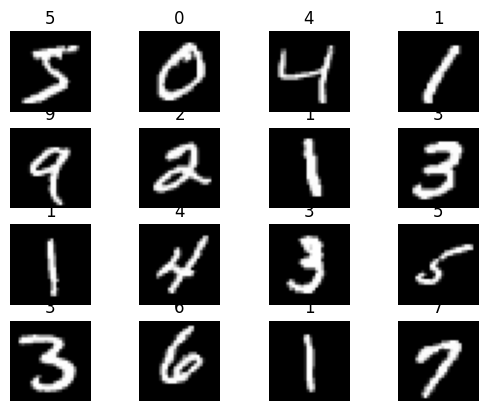

In [30]:
for i, imgae in enumerate(x_train[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(imgae,cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

### Scalling

In [37]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Flatening Data

In [38]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [39]:
len(x_train_flatten), len(x_test_flatten) # 60,000 training images and 10,000 test images

(60000, 10000)

In [40]:
x_train_flatten.shape, x_test_flatten.shape # (60000, 784) and (10000, 784)

((60000, 784), (10000, 784))

In [41]:
model = Sequential([
    InputLayer(shape=(len(x_train_flatten[0]),)), #input image shape is 28*28=784
    Dense(10, activation = 'sigmoid'), # 10 neurons for 10 classes 
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8141 - loss: 0.7172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9127 - loss: 0.3132
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9187 - loss: 0.2904
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9207 - loss: 0.2779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9254 - loss: 0.2662


In [44]:
model.evaluate(x_test_flatten, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.2998


[0.26453614234924316, 0.9261999726295471]

In [50]:
probability= model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [51]:
probability.shape # (10000, 10)

(10000, 10)

In [52]:
result=[np.argmax(i) for i in probability]

In [55]:
len(result)

10000

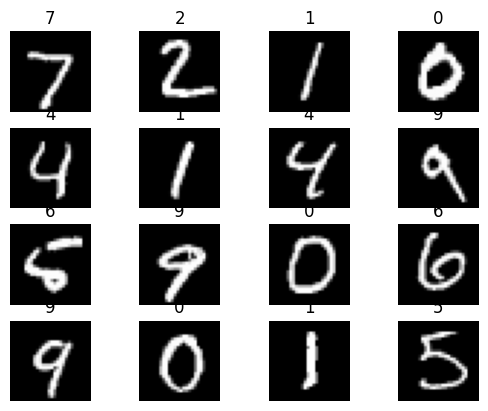

In [57]:
for i,image in enumerate(x_test[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.title(result[i])